<a href="https://colab.research.google.com/github/Vanessa-Ongodi/Certification-Projects/blob/main/Vanessa_Stage_D_Code_for_Africa_Food_Production_and_Supply_(2004_2013).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.io as pio
%matplotlib inline

# Quiz

In [ ]:
production = pd.read_csv("Africa Food Production - Sheet1.csv")
production.head()

Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111

In [ ]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [ ]:
#rename value column by adding the unit in metric kilotons
production = production.rename(columns={'Value': 'Value(kt)'})

In [ ]:
#group data
production_grouped = production.groupby(['Country', 'Year', 'Item'])['Value(kt)'].sum()
production_grouped = production_grouped.to_frame().reset_index()
production_grouped.head()

Country  Year                 Item  Value(kt)
0  Algeria  2004  Apples and products        165
1  Algeria  2004              Bananas          0
2  Algeria  2004  Barley and products       1212
3  Algeria  2004                Beans          2
4  Algeria  2004                 Beer        110

In [ ]:
#total the production
production_total = production.groupby(['Country', 'Year'])['Value(kt)'].sum()
production_total = production_total.to_frame().reset_index()
production_total.head()

Country  Year  Value(kt)
0  Algeria  2004      15536
1  Algeria  2005      15667
2  Algeria  2006      16417
3  Algeria  2007      14763
4  Algeria  2008      13841

1. Country with highest oat production

In [ ]:
production_oats = production[(production["Item"] == "Oats")]
production_oats_2010 = production_oats[(production_oats["Year"] == 2010)]
production_oats_2010

Country  Item  Year  Value(kt)
46          Algeria  Oats  2010         88
6406       Ethiopia  Oats  2010         48
7746          Ghana  Oats  2010          0
9286          Kenya  Oats  2010          3
10026       Lesotho  Oats  2010          0
13186       Morocco  Oats  2010         37
17816  South Africa  Oats  2010         34
20056       Tunisia  Oats  2010          2
22516      Zimbabwe  Oats  2010          1

In [ ]:
supply = pd.read_csv("Africa Food Supply - Sheet1.csv")
supply.head()

Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048

In [ ]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [ ]:
#rename value column by adding the unit in metric kilotons
supply = supply.rename(columns={'Value': 'Value(kcal)'})

In [ ]:
#group data
supply_grouped = supply.groupby(['Country', 'Year'])['Value(kcal)'].sum()
supply_grouped = supply_grouped.to_frame().reset_index()
supply_grouped.head()

Country  Year  Value(kcal)
0  Algeria  2004         2987
1  Algeria  2005         2958
2  Algeria  2006         3047
3  Algeria  2007         3041
4  Algeria  2008         3048

2. Lowest food supply between 2004 to 2006

In [ ]:
supply_2004 = supply[(supply["Year"] == 2004)]
supply_2004_sort = supply_2004.sort_values(['Value(kcal)'], ascending=[True])
supply_2004_sort.head()

Country  Year  Value(kcal)
430                    Zambia  2004         1866
130                  Ethiopia  2004         1882
320                    Rwanda  2004         1969
220                Madagascar  2004         1980
70   Central African Republic  2004         1989

In [ ]:
supply_2005 = supply[(supply["Year"] == 2005)]
supply_2005_sort = supply_2005.sort_values(['Value(kcal)'], ascending=[True])
supply_2005_sort.head()

Country  Year  Value(kcal)
431                    Zambia  2005         1873
131                  Ethiopia  2005         1978
441                  Zimbabwe  2005         2025
71   Central African Republic  2005         2026
81                       Chad  2005         2034

In [ ]:
supply_2006 = supply[(supply["Year"] == 2006)]
supply_2006_sort = supply_2006.sort_values(['Value(kcal)'], ascending=[True])
supply_2006_sort.head()

Country  Year  Value(kcal)
432                    Zambia  2006         1838
132                  Ethiopia  2006         1967
82                       Chad  2006         2022
72   Central African Republic  2006         2029
322                    Rwanda  2006         2044

# Data Storytelling Project

## World Food Production and Consumption - Africa as a Case Study



## Regions of Africa

In [ ]:
#items produced from 2004 - 2013
production_grouped_item = production.groupby(['Country', 'Item'])['Value(kt)'].sum()
production_grouped_item = production_grouped_item.to_frame().reset_index()
production_grouped_item.head()

Country                 Item  Value(kt)
0  Algeria  Apples and products       3003
1  Algeria              Bananas          0
2  Algeria  Barley and products      12770
3  Algeria                Beans         11
4  Algeria                 Beer       1358

In [ ]:
#save as csv
production_grouped_item.to_csv('Items (2004-2013).csv', index=True)

### North Africa


In [ ]:
#separate north africa regions
North = production_grouped_item.loc[production_grouped_item['Country'].isin(["Algeria", "Egypt", "Morocco", "Tunisia"])]
North

Country                   Item  Value(kt)
0     Algeria    Apples and products       3003
1     Algeria                Bananas          0
2     Algeria    Barley and products      12770
3     Algeria                  Beans         11
4     Algeria                   Beer       1358
...       ...                    ...        ...
2060  Tunisia      Sweeteners, Other         33
2061  Tunisia  Tomatoes and products      11148
2062  Tunisia      Vegetables, Other      15393
2063  Tunisia     Wheat and products      13542
2064  Tunisia                   Wine        282

[266 rows x 3 columns]

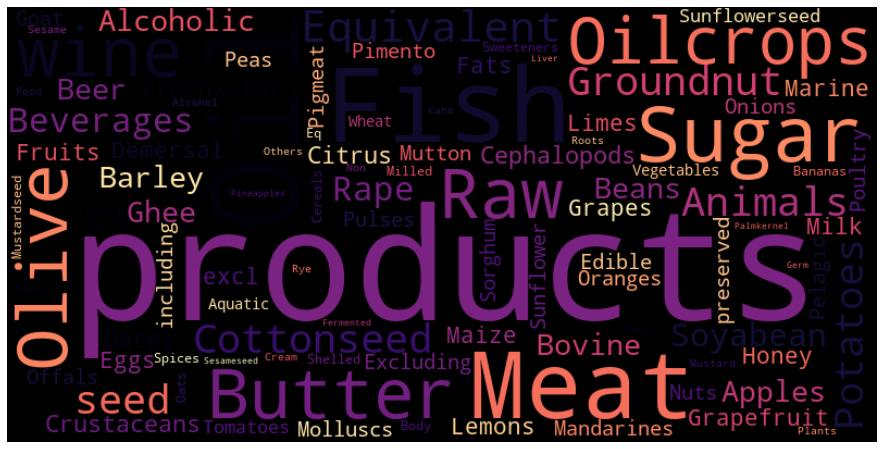

In [ ]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in North.Item.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='black',colormap='magma').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

### Southern Africa


In [ ]:
#separate southern africa regions
South = production_grouped_item.loc[production_grouped_item['Country'].isin(['Angola', 'Botswana', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'South Africa', 'Zambia', 'Zimbabwe'])]
South.head()

Country                  Item  Value(kt)
58  Angola               Bananas      18746
59  Angola                 Beans       1707
60  Angola                  Beer       6046
61  Angola  Beverages, Alcoholic         77
62  Angola  Beverages, Fermented       2602

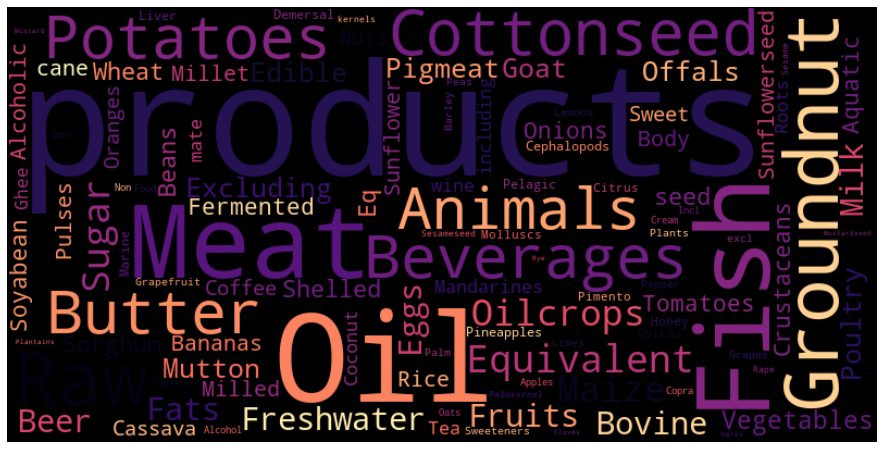

In [ ]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in South.Item.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='black',colormap='magma').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

## East Africa


In [ ]:
#separate east africa regions
East = production_grouped_item.loc[production_grouped_item['Country'].isin(['Djibouti', 'Ethiopia', 'Kenya', 'Rwanda', 'Sudan', 'Uganda'])]
East.head()

Country         Item  Value(kt)
544  Djibouti        Beans         20
545  Djibouti  Bovine Meat         53
546  Djibouti  Cephalopods          0
547  Djibouti  Crustaceans          0
548  Djibouti        Dates          0

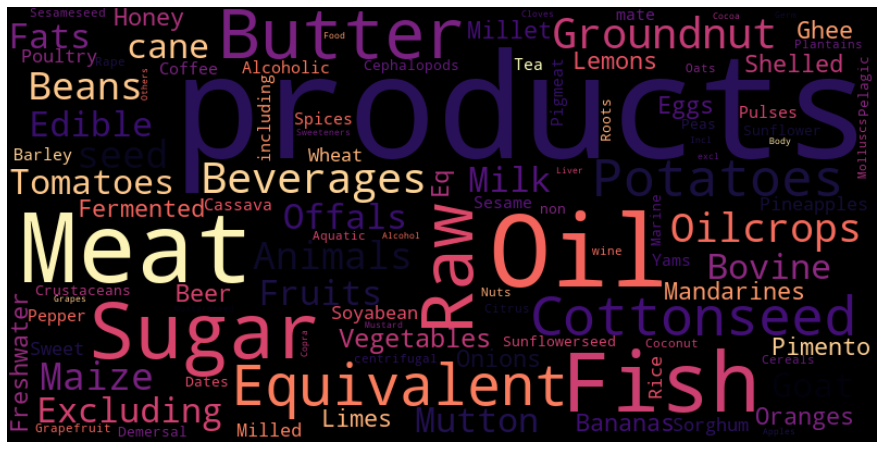

In [ ]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in East.Item.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='black',colormap='magma').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

## West Africa


In [ ]:
#separate west africa regions
West = production_grouped_item.loc[production_grouped_item['Country'].isin(['Benin', 'Burkina Faso', 'Cabo Verde', 'Cote dIvoire', 'Gambia', 'Ghana', 'Guinea',' Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'])]
West.head()

Country                     Item  Value(kt)
112   Benin  Aquatic Animals, Others          0
113   Benin                  Bananas        157
114   Benin                    Beans       1060
115   Benin                     Beer        675
116   Benin     Beverages, Fermented        304

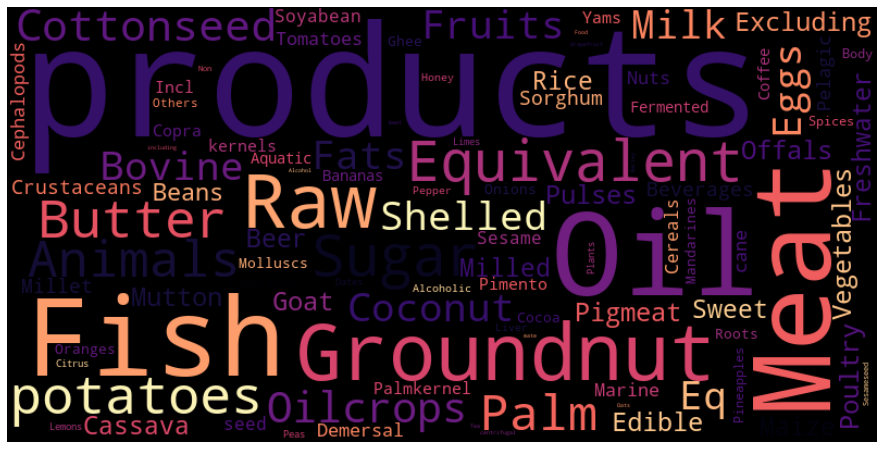

In [ ]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in West.Item.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='black', colormap='magma').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

## Central Africa



In [ ]:
#separate central africa regions
Central = production_grouped_item.loc[production_grouped_item['Country'].isin(['Cameroon', 'Central African Republic', 'Chad', 'Congo', 'Gabon', 'Sao Tome and P'])]
Central.head()

Country                  Item  Value(kt)
281  Cameroon               Bananas      11823
282  Cameroon                 Beans       2954
283  Cameroon                  Beer       5562
284  Cameroon  Beverages, Alcoholic         19
285  Cameroon  Beverages, Fermented       9829

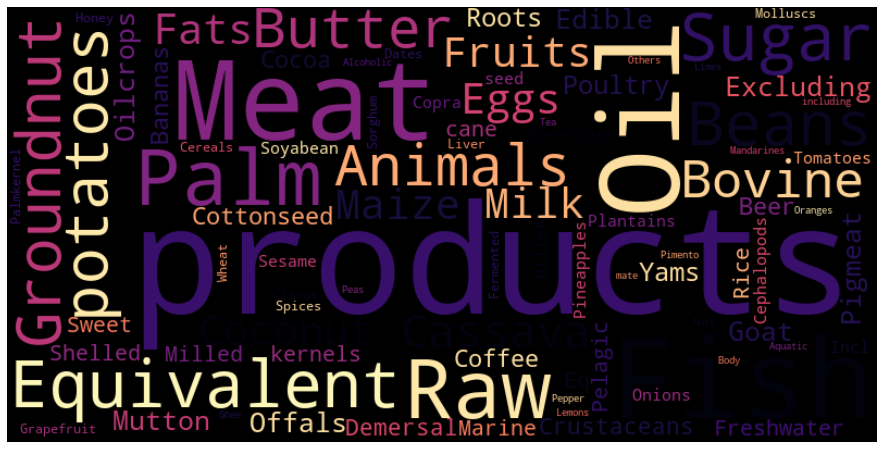

In [ ]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in Central.Item.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='black',colormap='magma').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

## General Mean Production and Supply

In [ ]:
production_data = production['Country'].value_counts().sort_index().index

In [ ]:
production_data1 = production.groupby('Country')['Value(kt)'].agg('mean')

In [ ]:
#make the map
import folium
trace = go.Choropleth(
    locationmode = 'country names',
    locations = production_data,
    text = production_data,
    colorscale = 'magma',
    z = production_data1.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Food Production in Different Parts of Africa from 2004 - 2013')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [ ]:
supply_data = supply['Country'].value_counts().sort_index().index

In [ ]:
supply_data1 = supply.groupby('Country')['Value(kcal)'].agg('mean')

In [ ]:
#make the map
import folium
trace = go.Choropleth(
    locationmode = 'country names',
    locations = supply_data,
    text = supply_data,
    colorscale = 'magma',
    z = supply_data1.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Food Supply in Different Parts of Africa from 2004 - 2013')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

## Food production and supply over the years

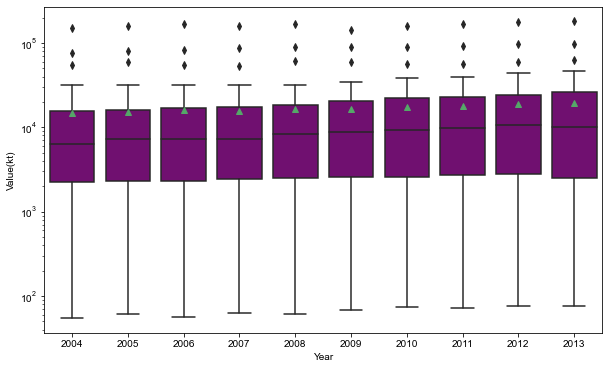

In [ ]:
bar,ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Year", y="Value(kt)", data=production_total, color='purple', showmeans=True)
ax.set_yscale('log')
plt.savefig("Production boxplot.svg")

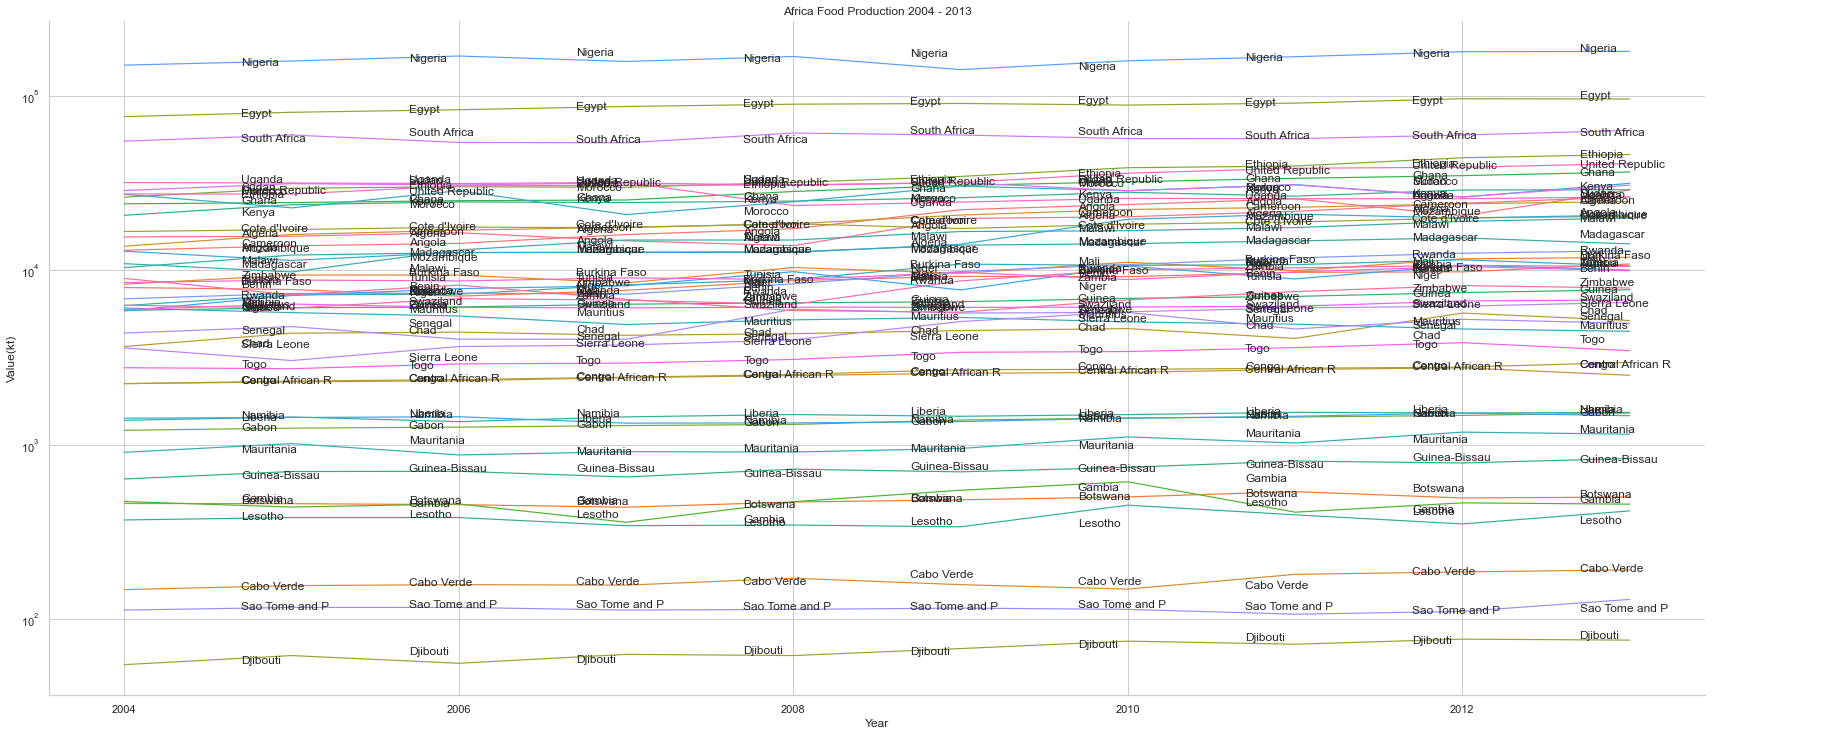

In [ ]:
#identifying outliers
#plot data
# Define variables for chart
Country = production_total['Country']
Year = production_total['Year']
Value = production_total['Value(kt)']
# Keyword arguments for styling the plot
kwargs = dict (linestyle='-', hue='Country', linewidth=1.2, markersize=13)
ax = sns.relplot(
    data=production_total, 
    x="Year", y="Value(kt)",
    height=10, aspect=2.4, 
    kind="line", legend=False,
**kwargs).set(title="Africa Food Production 2004 - 2013")
ax.fig.get_axes()[0].set_yscale('log')
# Annotate label points 
for i, Country in enumerate (Country):
    plt.annotate(Country, (Year[i]+0.7, Value[i]+0.5) )
plt.savefig("productionlineplot.svg")

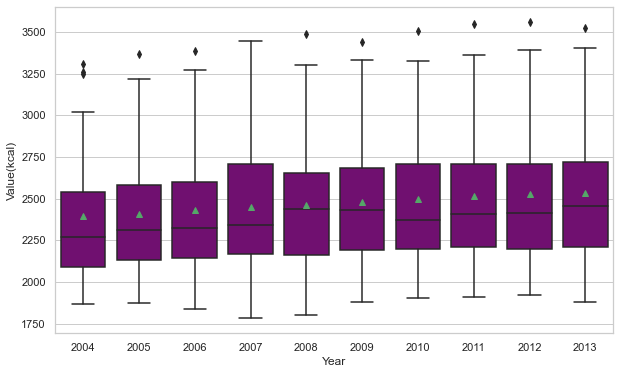

In [ ]:
bar,ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Year", y="Value(kcal)", data=supply_grouped, color = 'purple', showmeans=True)
plt.savefig("supplyboxplot.svg")

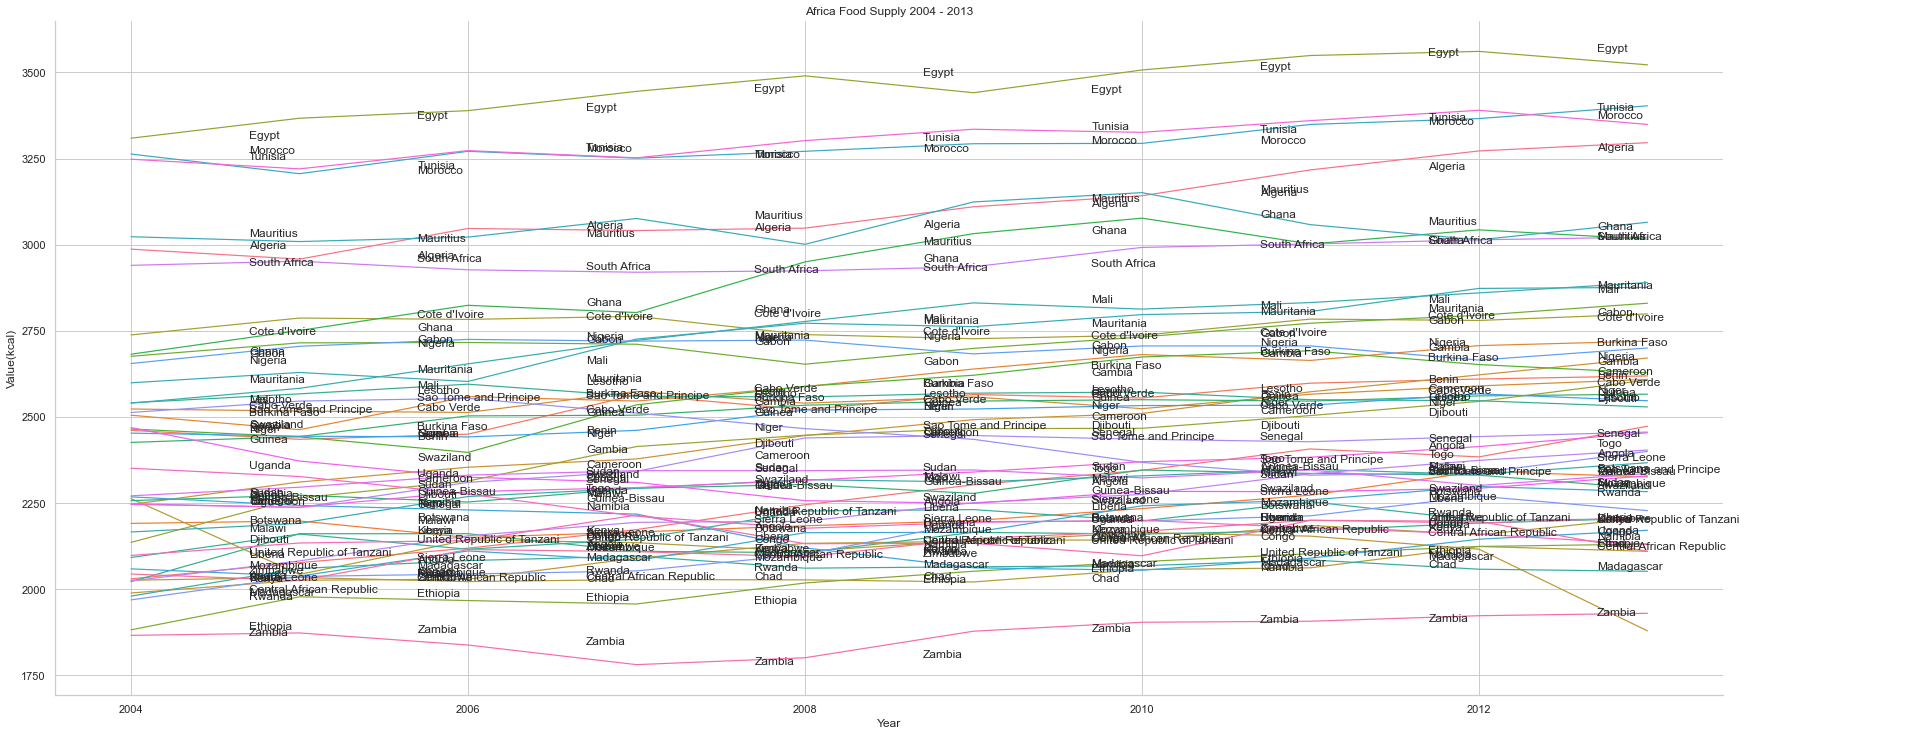

In [ ]:
#identifying outliers
#plot data
# Define variables for chart
Country = supply_grouped['Country']
Year = supply_grouped['Year']
Value = supply_grouped['Value(kcal)']
# Keyword arguments for styling the plot
kwargs = dict (linestyle='-', hue='Country', linewidth=1.2, markersize=13)
ax = sns.relplot(
    data=supply_grouped, 
    x="Year", y="Value(kcal)",
    height=10, aspect=2.4, 
    kind="line", legend=False,
**kwargs).set(title="Africa Food Supply 2004 - 2013")
# Annotate label points 
for i, Country in enumerate (Country):
    plt.annotate(Country, (Year[i]+0.7, Value[i]+0.5) )
plt.savefig("supplylinechart.svg")

## Identifying Trends in Production and Supply

In [ ]:
food_trend = pd.merge(production_total, supply_grouped, how='inner')
food_trend.head()

Country  Year  Value(kt)  Value(kcal)
0  Algeria  2004      15536         2987
1  Algeria  2005      15667         2958
2  Algeria  2006      16417         3047
3  Algeria  2007      14763         3041
4  Algeria  2008      13841         3048

## Compare trends for year


In [ ]:
food_trend1 = food_trend.groupby(['Year']).median()
food_trend1.head()

Value(kt)  Value(kcal)
Year                        
2004     6586.5       2311.0
2005     7236.0       2319.0
2006     7353.0       2328.0
2007     7487.0       2361.0
2008     8547.0       2442.5

In [ ]:
food_trend1.to_csv('food_trend1.csv', index=True)

In [ ]:
df_year = pd.read_csv('food_trend1.csv')
df_year.head()

Year  Value(kt)  Value(kcal)
0  2004     6586.5       2311.0
1  2005     7236.0       2319.0
2  2006     7353.0       2328.0
3  2007     7487.0       2361.0
4  2008     8547.0       2442.5

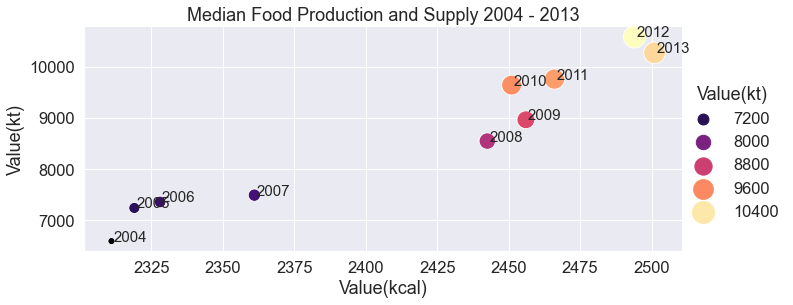

In [ ]:
#plot data
Year = df_year['Year']
Value1 = df_year['Value(kt)']
Value2 = df_year['Value(kcal)']
# Keyword arguments for styling the plot
sns.set(font_scale = 1.5)
ax = sns.relplot(
    data=df_year, 
    x="Value(kcal)", y="Value(kt)",size=('Value(kt)'),sizes=(50,500),
    height=4, aspect=2.4, 
    legend=True,hue='Value(kt)', palette=('magma')).set(title="Median Food Production and Supply 2004 - 2013")
# Annotate label points 
for i, Year in enumerate (Year):
    plt.annotate(Year, (Value2[i]+0.7, Value1[i]+0.5), size=15)
plt.savefig("trendmedian.svg")

## Compare Trend for Country

In [ ]:
food_trend2 = food_trend.groupby(['Country']).median()
food_trend2.head()

Year  Value(kt)  Value(kcal)
Country                                     
Algeria       2008.5    18118.5       3079.0
Angola        2008.5    18896.5       2274.0
Benin         2008.5     8961.5       2559.5
Botswana      2008.5      477.0       2198.5
Burkina Faso  2008.5     9780.5       2613.5

In [ ]:
food_trend2.to_csv('food_trend2.csv', index=True)

In [ ]:
df_country = pd.read_csv('food_trend2.csv')
df_country.head()

Country    Year  Value(kt)  Value(kcal)
0       Algeria  2008.5    18118.5       3079.0
1        Angola  2008.5    18896.5       2274.0
2         Benin  2008.5     8961.5       2559.5
3      Botswana  2008.5      477.0       2198.5
4  Burkina Faso  2008.5     9780.5       2613.5

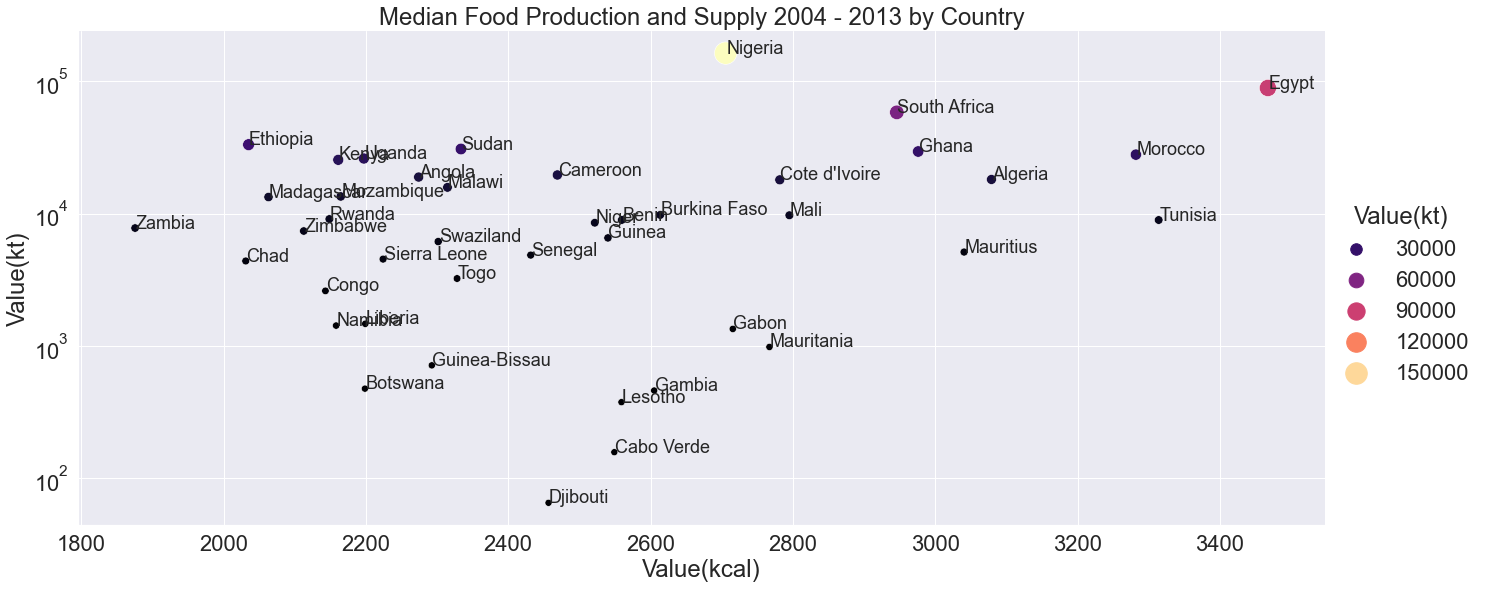

In [ ]:
#plot data
Country = df_country['Country']
Value1 = df_country['Value(kt)']
Value2 = df_country['Value(kcal)']
# Keyword arguments for styling the plot
sns.set(font_scale = 2)
ax = sns.relplot(
    data=df_country, 
    x="Value(kcal)", y="Value(kt)", size=('Value(kt)'),sizes=(50,500),
    height=8, aspect=2.4, 
    legend=True, hue='Value(kt)', palette=('magma')).set(title="Median Food Production and Supply 2004 - 2013 by Country")
ax.fig.get_axes()[0].set_yscale('log')
# Annotate label points 
for i, Country in enumerate (Country):
    plt.annotate(Country, (Value2[i]+0.7, Value1[i]+0.5), size=18)

## Highest producers of staple foods



### Maize

In [ ]:
production_maize = production[(production["Item"] == "Maize and products")]

In [ ]:
#top 10 countries
production_maize = production_maize.groupby('Country')['Value(kt)'].mean()
production_maize = production_maize.to_frame(name='value').reset_index()
production_maize_sort = production_maize.sort_values(['value'], ascending=[False])
production_maize_sort = production_maize_sort.head(10)
production_maize_sort

Country    value
35     South Africa  10734.3
30          Nigeria   7689.8
12            Egypt   7099.3
13         Ethiopia   4574.5
40  United Republic   4316.6
19            Kenya   3032.8
22           Malawi   2926.5
39           Uganda   1991.4
41           Zambia   1917.0
27       Mozambique   1536.7

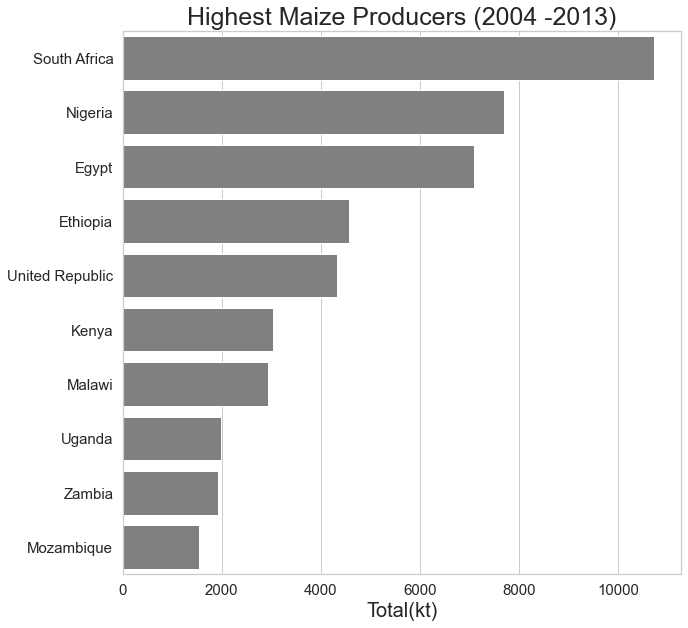

In [ ]:
#barchart
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='value', y='Country', data=production_maize_sort, ci=None, color='grey',orient='h')
ax.set_title('Highest Maize Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig("maize.svg")

### Rice

In [ ]:
#top 10countries
production_rice = production[(production["Item"] == "Rice (Milled Equivalent)")]
production_rice = production_rice.groupby('Country')['Value(kt)'].mean()
production_rice = production_rice.to_frame(name='value').reset_index()
production_rice_sort = production_rice.sort_values(['value'], ascending=[False])
production_rice_sort = production_rice_sort.head(10)
production_rice_sort

Country   value
9             Egypt  4037.0
26          Nigeria  2696.4
18       Madagascar  2611.8
35  United Republic  1095.6
14           Guinea  1040.0
20             Mali  1037.1
8     Cote d'Ivoire   643.9
29     Sierra Leone   603.8
28          Senegal   246.2
13            Ghana   244.3

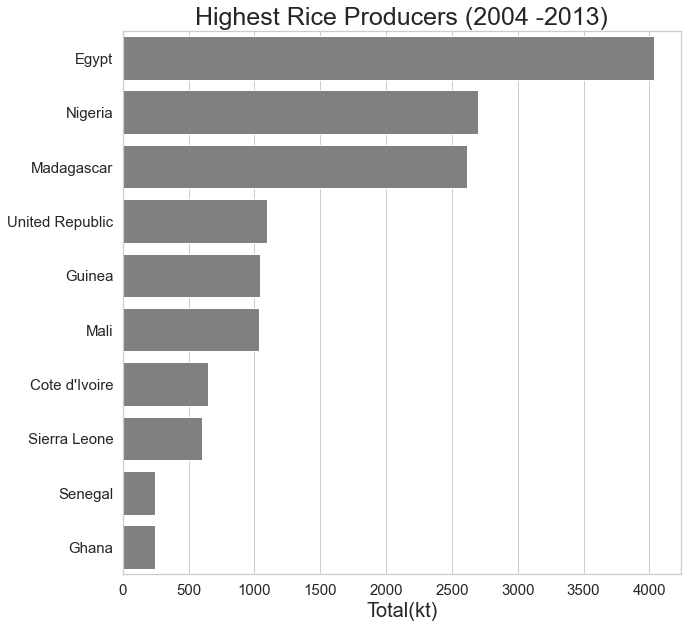

In [ ]:
#barchart
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='value', y='Country', data=production_rice_sort, ci=None, color='grey',orient='h')
ax.set_title('Highest Rice Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig("rice.svg")

### Wheat

In [ ]:
#top 10 countries
production_wheat = production[(production["Item"] == "Wheat and products")]
production_wheat = production_wheat.groupby('Country')['Value(kt)'].mean()
production_wheat = production_wheat.to_frame(name='value').reset_index()
production_wheat_sort = production_wheat.sort_values(['value'], ascending=[False])
production_wheat_sort = production_wheat_sort.head(10)
production_wheat_sort

Country   value
5          Egypt  8131.1
13       Morocco  4833.9
6       Ethiopia  2710.9
0        Algeria  2610.8
19  South Africa  1891.0
22       Tunisia  1354.2
20         Sudan   483.6
7          Kenya   366.3
25        Zambia   167.5
26      Zimbabwe    99.6

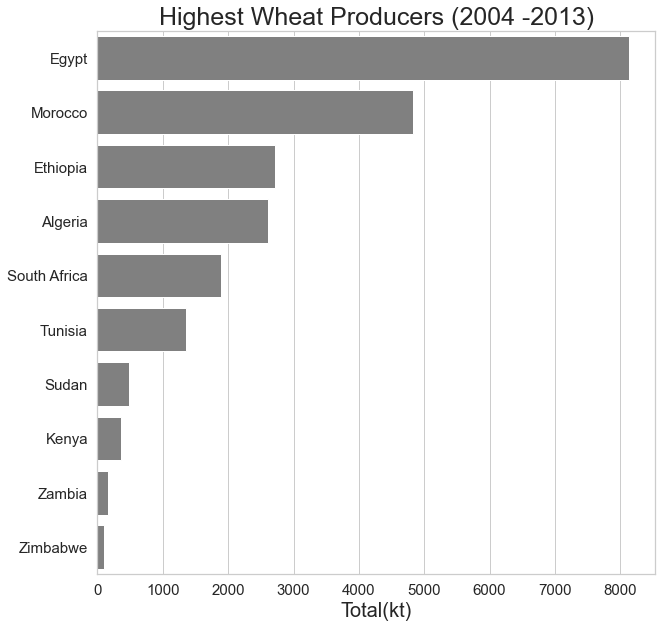

In [ ]:
#barchart
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='value', y='Country', data=production_wheat_sort, ci=None, color='grey',orient='h')
ax.set_title('Highest Wheat Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig("wheat.svg")

### Potatoes

In [ ]:
#top 10 countries
production_potato = production[(production["Item"] == "Potatoes and products")]
production_potato = production_potato.groupby('Country')['Value(kt)'].mean()
production_potato = production_potato.to_frame(name='value').reset_index()
production_potato_sort = production_potato.sort_values(['value'], ascending=[False])
production_potato_sort = production_potato_sort.head(10)
production_potato_sort

Country   value
10            Egypt  3501.7
16           Malawi  3123.4
0           Algeria  2885.7
13            Kenya  2373.0
27     South Africa  2002.0
20          Morocco  1565.0
25           Rwanda  1562.2
32  United Republic  1026.0
24          Nigeria   965.7
1            Angola   556.6

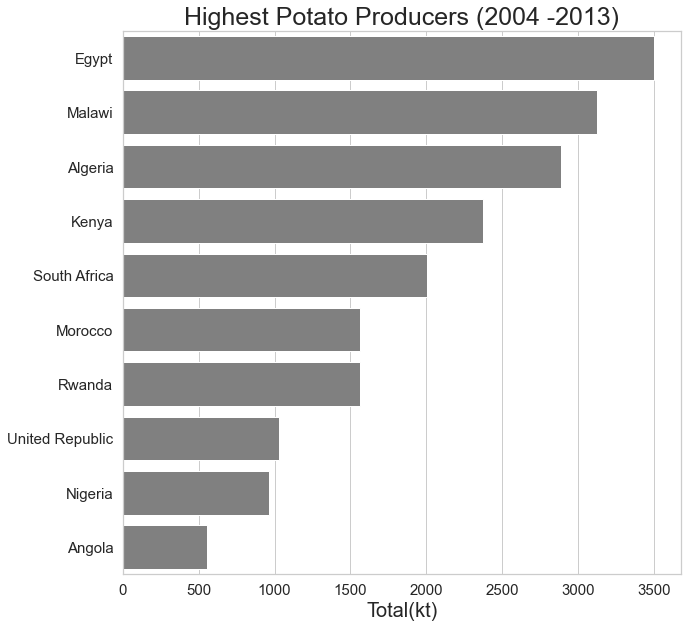

In [ ]:
#barchart
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='value', y='Country', data=production_potato_sort, ci=None, color='grey',orient='h')
ax.set_title('Highest Potato Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig("potatoes.svg")

### Cassava

In [ ]:
#top 10 countries
production_cassava = production[(production["Item"] == "Cassava and products")]
production_cassava = production_cassava.groupby('Country')['Value(kt)'].mean()
production_cassava = production_cassava.to_frame(name='value').reset_index()
production_cassava_sort = production_cassava.sort_values(['value'], ascending=[False])
production_cassava_sort = production_cassava_sort.head(10)
production_cassava_sort

Country    value
22          Nigeria  45288.1
11            Ghana  12102.6
0            Angola  11428.6
20       Mozambique   7124.3
30  United Republic   5205.7
29           Uganda   3831.7
17           Malawi   3588.1
4          Cameroon   3290.4
1             Benin   3245.8
16       Madagascar   3016.5

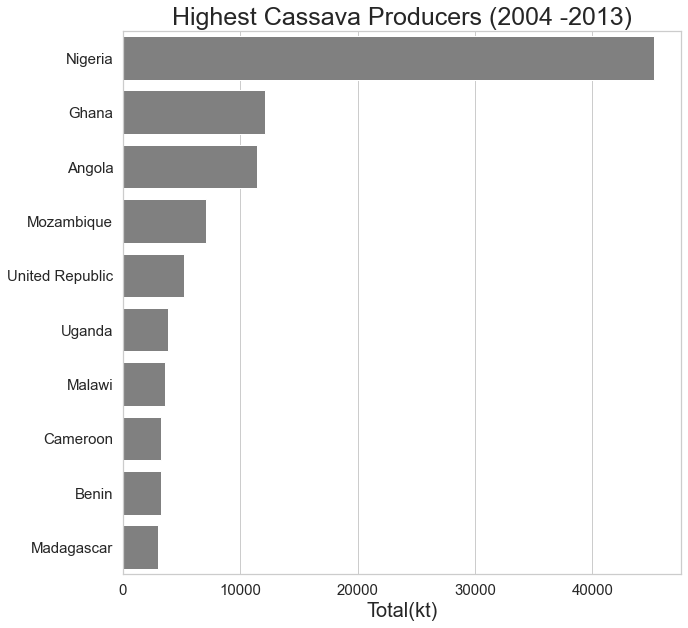

In [ ]:
#barchart
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='value', y='Country', data=production_cassava_sort, ci=None, color='grey',orient='h')
ax.set_title('Highest Cassava Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig("cassava.svg")

## Compare percentage shortage and surplus in total production and supply in africa
To determine shortage, we will have to evaluate if the total production for each year matches the supply for the population. To do this, I got a population data for African countries from Kaggle:https://www.kaggle.com/imdevskp/world-population-19602018?select=population_total_long.csv and merged it with the dataset created for the production and supply.

**Steps for calculating food supply per population for each year;**

Value(kcal) per person per day x year (365 days per year or 366 for leap years)=
total kcal per person per year

Convert kcal per person per year to kt where 1 kcal (IT) = 1.0006692160612E-9 kton = converted kt

To calculate total consumption:

Population x Converted kt = Total_consumption (kt)

Compare with Value (kt) which is production the percentage shortage

Value(kt)-Total_consuption(kt)= Shortage or Surplus

Shortage_Surplus/Total consumption(kt)* 100 = percentage surplus or shortage

In [ ]:
#import data
population = pd.read_csv("African Population 2004-2013.csv")
population.head()

Country  Year  Population
0  Algeria  2004    32692163
1  Algeria  2005    33149724
2  Algeria  2006    33641002
3  Algeria  2007    34166972
4  Algeria  2008    34730608

In [ ]:
#join dataset with population data
food_population = pd.merge(food_trend, population, how='inner')
food_population.head()

Country  Year  Value(kt)  Value(kcal)  Population
0  Algeria  2004      15536         2987    32692163
1  Algeria  2005      15667         2958    33149724
2  Algeria  2006      16417         3047    33641002
3  Algeria  2007      14763         3041    34166972
4  Algeria  2008      13841         3048    34730608

### 2004

In [ ]:
#separate 2004
food_population_2004 = food_population[(food_trend["Year"] == 2004)]
food_population_2004.head()

<ipython-input-57-371c40510e55>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
0        Algeria  2004      15536         2987    32692163
10        Angola  2004      13028         2030    18758145
20         Benin  2004       7963         2461     7750004
30      Botswana  2004        461         2191     1765527
40  Burkina Faso  2004       8323         2505    13030569

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2004['Value(kcal)_per_year'] = food_population_2004.loc[:,'Value(kcal)'] *366

<ipython-input-58-220bc5dd9b4c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2004['Converted(kt)'] = food_population_2004.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-59-20124c1adde9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2004['Total_consumption(kt)'] = food_population_2004['Population']*food_population_2004['Converted(kt)']
food_population_2004.head()

<ipython-input-60-4ac8e0ac567c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
0        Algeria  2004      15536         2987    32692163   
10        Angola  2004      13028         2030    18758145   
20         Benin  2004       7963         2461     7750004   
30      Botswana  2004        461         2191     1765527   
40  Burkina Faso  2004       8323         2505    13030569   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
0                1093242       0.001094           35764.363743  
10                742980       0.000743           13946.253387  
20                900726       0.000901            6985.301653  
30                801906       0.000802            1416.734162  
40                916830       0.000917           11954.811578

In [ ]:
#shortage
food_population_2004['Shortage_Surplus'] = food_population_2004['Value(kt)']-food_population_2004['Total_consumption(kt)']
food_population_2004.head()

<ipython-input-61-b04ef008fc39>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
0        Algeria  2004      15536         2987    32692163   
10        Angola  2004      13028         2030    18758145   
20         Benin  2004       7963         2461     7750004   
30      Botswana  2004        461         2191     1765527   
40  Burkina Faso  2004       8323         2505    13030569   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
0                1093242       0.001094           35764.363743   
10                742980       0.000743           13946.253387   
20                900726       0.000901            6985.301653   
30                801906       0.000802            1416.734162   
40                916830       0.000917           11954.811578   

    Shortage_Surplus  
0      -20228.363743  
10       -918.253387  
20        977.698347  
30       -955.734162  
40      -3631.811578

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2004['Percentage_Shortage_Surplus'] = food_population_2004['Shortage_Surplus']/food_population_2004['Total_consumption(kt)']*100
food_population_2004.head()

<ipython-input-62-a994ef4825b2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
0        Algeria  2004      15536         2987    32692163   
10        Angola  2004      13028         2030    18758145   
20         Benin  2004       7963         2461     7750004   
30      Botswana  2004        461         2191     1765527   
40  Burkina Faso  2004       8323         2505    13030569   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
0                1093242       0.001094           35764.363743   
10                742980       0.000743           13946.253387   
20                900726       0.000901            6985.301653   
30                801906       0.000802            1416.734162   
40                916830       0.000917           11954.811578   

    Shortage_Surplus  Percentage_Shortage_Surplus  
0      -20228.363743                   -56.560111  
10       -918.253387                    -6.584230  
20        977.698347                    13.996509  
30       -955.734162                   -67.460374  
40      -3631.811578                   -30.379497

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2005

In [ ]:
#separate 2005
food_population_2005 = food_population[(food_trend["Year"] == 2005)]
food_population_2005.head()

<ipython-input-63-2178cbceac28>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
1        Algeria  2005      15667         2958    33149724
11        Angola  2005      13811         2077    19433602
21         Benin  2005       7764         2435     7982225
31      Botswana  2005        460         2198     1799078
41  Burkina Faso  2005       9392         2463    13421930

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2005['Value(kcal)_per_year'] = food_population_2005.loc[:,'Value(kcal)'] *365

<ipython-input-64-50bd09e93dd6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2005['Converted(kt)'] = food_population_2005.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-65-996e14cbb720>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2005['Total_consumption(kt)'] = food_population_2005['Population']*food_population_2005['Converted(kt)']
food_population_2005.head()

<ipython-input-66-c0e4a1933d85>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
1        Algeria  2005      15667         2958    33149724   
11        Angola  2005      13811         2077    19433602   
21         Benin  2005       7764         2435     7982225   
31      Botswana  2005        460         2198     1799078   
41  Burkina Faso  2005       9392         2463    13421930   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
1                1079670       0.001080           35814.714264  
11                758105       0.000759           14742.570211  
21                888775       0.000889            7099.149712  
31                802270       0.000803            1444.312218  
41                898995       0.000900           12074.322887

In [ ]:
#shortage
food_population_2005['Shortage_Surplus'] = food_population_2005['Value(kt)']-food_population_2005['Total_consumption(kt)']
food_population_2005.head()

<ipython-input-67-fdee35308a85>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
1        Algeria  2005      15667         2958    33149724   
11        Angola  2005      13811         2077    19433602   
21         Benin  2005       7764         2435     7982225   
31      Botswana  2005        460         2198     1799078   
41  Burkina Faso  2005       9392         2463    13421930   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
1                1079670       0.001080           35814.714264   
11                758105       0.000759           14742.570211   
21                888775       0.000889            7099.149712   
31                802270       0.000803            1444.312218   
41                898995       0.000900           12074.322887   

    Shortage_Surplus  
1      -20147.714264  
11       -931.570211  
21        664.850288  
31       -984.312218  
41      -2682.322887

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2005['Percentage_Shortage_Surplus'] = food_population_2005['Shortage_Surplus']/food_population_2005['Total_consumption(kt)']*100
food_population_2005.head()

<ipython-input-68-38a43a042261>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
1        Algeria  2005      15667         2958    33149724   
11        Angola  2005      13811         2077    19433602   
21         Benin  2005       7764         2435     7982225   
31      Botswana  2005        460         2198     1799078   
41  Burkina Faso  2005       9392         2463    13421930   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
1                1079670       0.001080           35814.714264   
11                758105       0.000759           14742.570211   
21                888775       0.000889            7099.149712   
31                802270       0.000803            1444.312218   
41                898995       0.000900           12074.322887   

    Shortage_Surplus  Percentage_Shortage_Surplus  
1      -20147.714264                   -56.255410  
11       -931.570211                    -6.318913  
21        664.850288                     9.365210  
31       -984.312218                   -68.150931  
41      -2682.322887                   -22.215100

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2006

In [ ]:
#separate 2006
food_population_2006 = food_population[(food_trend["Year"] == 2006)]
food_population_2006.head()

<ipython-input-69-5846d4ca3f15>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
2        Algeria  2006      16417         3047    33641002
12        Angola  2006      14264         2119    20149901
22         Benin  2006       7110         2450     8216897
32      Botswana  2006        454         2150     1835908
42  Burkina Faso  2006       9393         2559    13829176

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2006['Value(kcal)_per_year'] = food_population_2006.loc[:,'Value(kcal)'] *365

<ipython-input-70-005d175c4403>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2006['Converted(kt)'] = food_population_2006.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-71-8856dd832160>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2006['Total_consumption(kt)'] = food_population_2006['Population']*food_population_2006['Converted(kt)']
food_population_2006.head()

<ipython-input-72-8f26658b07f9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
2        Algeria  2006      16417         3047    33641002   
12        Angola  2006      14264         2119    20149901   
22         Benin  2006       7110         2450     8216897   
32      Botswana  2006        454         2150     1835908   
42  Burkina Faso  2006       9393         2559    13829176   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
2                1112155       0.001113           37439.046635  
12                773435       0.000774           15595.068170  
22                894250       0.000895            7352.877515  
32                784750       0.000785            1441.692962  
42                934035       0.000935           12925.578625

In [ ]:
#shortage
food_population_2006['Shortage_Surplus'] = food_population_2006['Value(kt)']-food_population_2006['Total_consumption(kt)']
food_population_2006.head()

<ipython-input-73-7682028c4457>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
2        Algeria  2006      16417         3047    33641002   
12        Angola  2006      14264         2119    20149901   
22         Benin  2006       7110         2450     8216897   
32      Botswana  2006        454         2150     1835908   
42  Burkina Faso  2006       9393         2559    13829176   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
2                1112155       0.001113           37439.046635   
12                773435       0.000774           15595.068170   
22                894250       0.000895            7352.877515   
32                784750       0.000785            1441.692962   
42                934035       0.000935           12925.578625   

    Shortage_Surplus  
2      -21022.046635  
12      -1331.068170  
22       -242.877515  
32       -987.692962  
42      -3532.578625

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2006['Percentage_Shortage_Surplus'] = food_population_2006['Shortage_Surplus']/food_population_2006['Total_consumption(kt)']*100
food_population_2006.head()

<ipython-input-74-6d79d25182d2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
2        Algeria  2006      16417         3047    33641002   
12        Angola  2006      14264         2119    20149901   
22         Benin  2006       7110         2450     8216897   
32      Botswana  2006        454         2150     1835908   
42  Burkina Faso  2006       9393         2559    13829176   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
2                1112155       0.001113           37439.046635   
12                773435       0.000774           15595.068170   
22                894250       0.000895            7352.877515   
32                784750       0.000785            1441.692962   
42                934035       0.000935           12925.578625   

    Shortage_Surplus  Percentage_Shortage_Surplus  
2      -21022.046635                   -56.150059  
12      -1331.068170                    -8.535187  
22       -242.877515                    -3.303163  
32       -987.692962                   -68.509245  
42      -3532.578625                   -27.330139

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2007

In [ ]:
#separate 2007
food_population_2007 = food_population[(food_trend["Year"] == 2007)]
food_population_2007.head()

<ipython-input-75-d856bdd75523>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
3        Algeria  2007      14763         3041    34166972
13        Angola  2007      16025         2173    20905363
23         Benin  2007       7679         2564     8454793
33      Botswana  2007        439         2166     1875459
43  Burkina Faso  2007       8467         2546    14252021

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2007['Value(kcal)_per_year'] = food_population_2007.loc[:,'Value(kcal)'] *365

<ipython-input-76-d33cefaa3bf1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2007['Converted(kt)'] = food_population_2007.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-77-3aacbea4ff67>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2007['Total_consumption(kt)'] = food_population_2007['Population']*food_population_2007['Converted(kt)']
food_population_2007.head()

<ipython-input-78-764dbda2d326>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
3        Algeria  2007      14763         3041    34166972   
13        Angola  2007      16025         2173    20905363   
23         Benin  2007       7679         2564     8454793   
33      Botswana  2007        439         2166     1875459   
43  Burkina Faso  2007       8467         2546    14252021   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
3                1109965       0.001111           37949.522522  
13                793145       0.000794           16592.080398  
23                935860       0.000936            7917.797751  
33                790590       0.000791            1483.711390  
43                929290       0.000930           13253.123867

In [ ]:
#shortage
food_population_2007['Shortage_Surplus'] = food_population_2007['Value(kt)']-food_population_2007['Total_consumption(kt)']
food_population_2007.head()

<ipython-input-79-c15b49f9b254>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
3        Algeria  2007      14763         3041    34166972   
13        Angola  2007      16025         2173    20905363   
23         Benin  2007       7679         2564     8454793   
33      Botswana  2007        439         2166     1875459   
43  Burkina Faso  2007       8467         2546    14252021   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
3                1109965       0.001111           37949.522522   
13                793145       0.000794           16592.080398   
23                935860       0.000936            7917.797751   
33                790590       0.000791            1483.711390   
43                929290       0.000930           13253.123867   

    Shortage_Surplus  
3      -23186.522522  
13       -567.080398  
23       -238.797751  
33      -1044.711390  
43      -4786.123867

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2007['Percentage_Shortage_Surplus'] = food_population_2007['Shortage_Surplus']/food_population_2007['Total_consumption(kt)']*100
food_population_2007.head()

<ipython-input-80-2164c3f3e4c2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
3        Algeria  2007      14763         3041    34166972   
13        Angola  2007      16025         2173    20905363   
23         Benin  2007       7679         2564     8454793   
33      Botswana  2007        439         2166     1875459   
43  Burkina Faso  2007       8467         2546    14252021   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
3                1109965       0.001111           37949.522522   
13                793145       0.000794           16592.080398   
23                935860       0.000936            7917.797751   
33                790590       0.000791            1483.711390   
43                929290       0.000930           13253.123867   

    Shortage_Surplus  Percentage_Shortage_Surplus  
3      -23186.522522                   -61.098325  
13       -567.080398                    -3.417778  
23       -238.797751                    -3.015962  
33      -1044.711390                   -70.412035  
43      -4786.123867                   -36.113175

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2008

In [ ]:
#separate 2008
food_population_2008 = food_population[(food_trend["Year"] == 2008)]
food_population_2008.head()

<ipython-input-81-cc1501fafbdd>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
4        Algeria  2008      13841         3048    34730608
14        Angola  2008      17288         2245    21695634
24         Benin  2008       8723         2521     8696921
34      Botswana  2008        470         2184     1915639
44  Burkina Faso  2008      10373         2588    14689725

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2008['Value(kcal)_per_year'] = food_population_2008.loc[:,'Value(kcal)'] *366

<ipython-input-82-735dd78dda48>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2008['Converted(kt)'] = food_population_2008.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-83-71fe6e84d0b5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2008['Total_consumption(kt)'] = food_population_2008['Population']*food_population_2008['Converted(kt)']
food_population_2008.head()

<ipython-input-84-65f29a782fbd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
4        Algeria  2008      13841         3048    34730608   
14        Angola  2008      17288         2245    21695634   
24         Benin  2008       8723         2521     8696921   
34      Botswana  2008        470         2184     1915639   
44  Burkina Faso  2008      10373         2588    14689725   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
4                1115568       0.001116           38770.283250  
14                821670       0.000822           17838.581470  
24                922686       0.000923            8029.897392  
34                799344       0.000800            1532.279281  
44                947208       0.000948           13923.536661

In [ ]:
#shortage
food_population_2008['Shortage_Surplus'] = food_population_2008['Value(kt)']-food_population_2008['Total_consumption(kt)']
food_population_2008.head()

<ipython-input-85-4b41a12e0273>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
4        Algeria  2008      13841         3048    34730608   
14        Angola  2008      17288         2245    21695634   
24         Benin  2008       8723         2521     8696921   
34      Botswana  2008        470         2184     1915639   
44  Burkina Faso  2008      10373         2588    14689725   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
4                1115568       0.001116           38770.283250   
14                821670       0.000822           17838.581470   
24                922686       0.000923            8029.897392   
34                799344       0.000800            1532.279281   
44                947208       0.000948           13923.536661   

    Shortage_Surplus  
4      -24929.283250  
14       -550.581470  
24        693.102608  
34      -1062.279281  
44      -3550.536661

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2008['Percentage_Shortage_Surplus'] = food_population_2008['Shortage_Surplus']/food_population_2008['Total_consumption(kt)']*100
food_population_2008.head()

<ipython-input-86-d73d8d3969b8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
4        Algeria  2008      13841         3048    34730608   
14        Angola  2008      17288         2245    21695634   
24         Benin  2008       8723         2521     8696921   
34      Botswana  2008        470         2184     1915639   
44  Burkina Faso  2008      10373         2588    14689725   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
4                1115568       0.001116           38770.283250   
14                821670       0.000822           17838.581470   
24                922686       0.000923            8029.897392   
34                799344       0.000800            1532.279281   
44                947208       0.000948           13923.536661   

    Shortage_Surplus  Percentage_Shortage_Surplus  
4      -24929.283250                   -64.299977  
14       -550.581470                    -3.086464  
24        693.102608                     8.631525  
34      -1062.279281                   -69.326741  
44      -3550.536661                   -25.500250

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2009

In [ ]:
#separate 2009
food_population_2009 = food_population[(food_trend["Year"] == 2009)]
food_population_2009.head()

<ipython-input-87-42576ed6ac25>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
5        Algeria  2009      19820         3110    35333881
15        Angola  2009      22244         2303    22514281
25         Benin  2009       9235         2565     8944708
35      Botswana  2009        484         2199     1953498
45  Burkina Faso  2009       9607         2639    15141098

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2009['Value(kcal)_per_year'] = food_population_2009.loc[:,'Value(kcal)'] *365

<ipython-input-88-f4509eb2af13>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2009['Converted(kt)'] = food_population_2009.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-89-54dff4dffd14>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2009['Total_consumption(kt)'] = food_population_2009['Population']*food_population_2009['Converted(kt)']
food_population_2009.head()

<ipython-input-90-a542564c6103>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
5        Algeria  2009      19820         3110    35333881   
15        Angola  2009      22244         2303    22514281   
25         Benin  2009       9235         2565     8944708   
35      Botswana  2009        484         2199     1953498   
45  Burkina Faso  2009       9607         2639    15141098   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
5                1135150       0.001136           40136.096775  
15                840595       0.000841           18938.057214  
25                936225       0.000937            8379.863436  
35                802635       0.000803            1568.995162  
45                963235       0.000964           14594.195671

In [ ]:
#shortage
food_population_2009['Shortage_Surplus'] = food_population_2009['Value(kt)']-food_population_2009['Total_consumption(kt)']
food_population_2009.head()

<ipython-input-91-8ddf056f71cb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
5        Algeria  2009      19820         3110    35333881   
15        Angola  2009      22244         2303    22514281   
25         Benin  2009       9235         2565     8944708   
35      Botswana  2009        484         2199     1953498   
45  Burkina Faso  2009       9607         2639    15141098   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
5                1135150       0.001136           40136.096775   
15                840595       0.000841           18938.057214   
25                936225       0.000937            8379.863436   
35                802635       0.000803            1568.995162   
45                963235       0.000964           14594.195671   

    Shortage_Surplus  
5      -20316.096775  
15       3305.942786  
25        855.136564  
35      -1084.995162  
45      -4987.195671

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2009['Percentage_Shortage_Surplus'] = food_population_2009['Shortage_Surplus']/food_population_2009['Total_consumption(kt)']*100
food_population_2009.head()

<ipython-input-92-976479a05347>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
5        Algeria  2009      19820         3110    35333881   
15        Angola  2009      22244         2303    22514281   
25         Benin  2009       9235         2565     8944708   
35      Botswana  2009        484         2199     1953498   
45  Burkina Faso  2009       9607         2639    15141098   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
5                1135150       0.001136           40136.096775   
15                840595       0.000841           18938.057214   
25                936225       0.000937            8379.863436   
35                802635       0.000803            1568.995162   
45                963235       0.000964           14594.195671   

    Shortage_Surplus  Percentage_Shortage_Surplus  
5      -20316.096775                   -50.618018  
15       3305.942786                    17.456610  
25        855.136564                    10.204660  
35      -1084.995162                   -69.152231  
45      -4987.195671                   -34.172460

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2010

In [ ]:
#separate 2010
food_population_2010 = food_population[(food_trend["Year"] == 2010)]
food_population_2010.head()

<ipython-input-93-59288b98be8e>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
6        Algeria  2010      20263         3142    35977455
16        Angola  2010      23805         2345    23356246
26         Benin  2010       9200         2555     9199259
36      Botswana  2010        503         2234     1987105
46  Burkina Faso  2010      11122         2681    15605217

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2010['Value(kcal)_per_year'] = food_population_2010.loc[:,'Value(kcal)'] *365

<ipython-input-94-356e6c3bb240>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2010['Converted(kt)'] = food_population_2010.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-95-e60d213c713c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2010['Total_consumption(kt)'] = food_population_2010['Population']*food_population_2010['Converted(kt)']
food_population_2010.head()

<ipython-input-96-dd96bf8fea36>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
6        Algeria  2010      20263         3142    35977455   
16        Angola  2010      23805         2345    23356246   
26         Benin  2010       9200         2555     9199259   
36      Botswana  2010        503         2234     1987105   
46  Burkina Faso  2010      11122         2681    15605217   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
6                1146830       0.001148           41287.636589  
16                855925       0.000856           20004.573286  
26                932575       0.000933            8584.740166  
36                815410       0.000816            1621.389622  
46                978565       0.000979           15280.938584

In [ ]:
#shortage
food_population_2010['Shortage_Surplus'] = food_population_2010['Value(kt)']-food_population_2010['Total_consumption(kt)']
food_population_2010.head()

<ipython-input-97-ea1575e4a792>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
6        Algeria  2010      20263         3142    35977455   
16        Angola  2010      23805         2345    23356246   
26         Benin  2010       9200         2555     9199259   
36      Botswana  2010        503         2234     1987105   
46  Burkina Faso  2010      11122         2681    15605217   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
6                1146830       0.001148           41287.636589   
16                855925       0.000856           20004.573286   
26                932575       0.000933            8584.740166   
36                815410       0.000816            1621.389622   
46                978565       0.000979           15280.938584   

    Shortage_Surplus  
6      -21024.636589  
16       3800.426714  
26        615.259834  
36      -1118.389622  
46      -4158.938584

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2010['Percentage_Shortage_Surplus'] = food_population_2010['Shortage_Surplus']/food_population_2010['Total_consumption(kt)']*100
food_population_2010.head()

<ipython-input-98-74b51e52b1c4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
6        Algeria  2010      20263         3142    35977455   
16        Angola  2010      23805         2345    23356246   
26         Benin  2010       9200         2555     9199259   
36      Botswana  2010        503         2234     1987105   
46  Burkina Faso  2010      11122         2681    15605217   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
6                1146830       0.001148           41287.636589   
16                855925       0.000856           20004.573286   
26                932575       0.000933            8584.740166   
36                815410       0.000816            1621.389622   
46                978565       0.000979           15280.938584   

    Shortage_Surplus  Percentage_Shortage_Surplus  
6      -21024.636589                   -50.922354  
16       3800.426714                    18.997789  
26        615.259834                     7.166901  
36      -1118.389622                   -68.977228  
46      -4158.938584                   -27.216513

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2011

In [ ]:
#separate 2011
food_population_2011 = food_population[(food_trend["Year"] == 2011)]
food_population_2011.head()

<ipython-input-99-b81753a519cb>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
7        Algeria  2011      21778         3217    36661444
17        Angola  2011      25672         2407    24220661
27         Benin  2011       9735         2598     9460830
37      Botswana  2011        539         2273     2015402
47  Burkina Faso  2011       9954         2664    16081911

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2011['Value(kcal)_per_year'] = food_population_2011.loc[:,'Value(kcal)'] *365

<ipython-input-100-63215684fed5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2011['Converted(kt)'] = food_population_2011.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-101-8822d550adbb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2011['Total_consumption(kt)'] = food_population_2011['Population']*food_population_2011['Converted(kt)']
food_population_2011.head()

<ipython-input-102-95475f0bc32f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
7        Algeria  2011      21778         3217    36661444   
17        Angola  2011      25672         2407    24220661   
27         Benin  2011       9735         2598     9460830   
37      Botswana  2011        539         2273     2015402   
47  Burkina Faso  2011       9954         2664    16081911   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
7                1174205       0.001175           43076.859299  
17                878555       0.000879           21293.423196  
27                948270       0.000949            8977.425083  
37                829645       0.000830            1673.187167  
47                972360       0.000973           15647.871784

In [ ]:
#shortage
food_population_2011['Shortage_Surplus'] = food_population_2011['Value(kt)']-food_population_2011['Total_consumption(kt)']
food_population_2011.head()

<ipython-input-103-a05bfc93d7a8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
7        Algeria  2011      21778         3217    36661444   
17        Angola  2011      25672         2407    24220661   
27         Benin  2011       9735         2598     9460830   
37      Botswana  2011        539         2273     2015402   
47  Burkina Faso  2011       9954         2664    16081911   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
7                1174205       0.001175           43076.859299   
17                878555       0.000879           21293.423196   
27                948270       0.000949            8977.425083   
37                829645       0.000830            1673.187167   
47                972360       0.000973           15647.871784   

    Shortage_Surplus  
7      -21298.859299  
17       4378.576804  
27        757.574917  
37      -1134.187167  
47      -5693.871784

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2011['Percentage_Shortage_Surplus'] = food_population_2011['Shortage_Surplus']/food_population_2011['Total_consumption(kt)']*100
food_population_2011.head()

<ipython-input-104-13062934876a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
7        Algeria  2011      21778         3217    36661444   
17        Angola  2011      25672         2407    24220661   
27         Benin  2011       9735         2598     9460830   
37      Botswana  2011        539         2273     2015402   
47  Burkina Faso  2011       9954         2664    16081911   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
7                1174205       0.001175           43076.859299   
17                878555       0.000879           21293.423196   
27                948270       0.000949            8977.425083   
37                829645       0.000830            1673.187167   
47                972360       0.000973           15647.871784   

    Shortage_Surplus  Percentage_Shortage_Surplus  
7      -21298.859299                   -49.443854  
17       4378.576804                    20.563048  
27        757.574917                     8.438666  
37      -1134.187167                   -67.786031  
47      -5693.871784                   -36.387516

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2012

In [ ]:
#separate 2012
food_population_2012 = food_population[(food_trend["Year"] == 2012)]
food_population_2012.head()

<ipython-input-105-9400c2510929>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
8        Algeria  2012      24206         3272    37383887
18        Angola  2012      20505         2384    25107931
28         Benin  2012       9797         2610     9729248
38      Botswana  2012        496         2342     2039551
48  Burkina Faso  2012      11634         2707    16571246

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2012['Value(kcal)_per_year'] = food_population_2012.loc[:,'Value(kcal)'] *366

<ipython-input-106-6c646c8c7896>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2012['Converted(kt)'] = food_population_2012.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-107-79a02f9c7faf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2012['Total_consumption(kt)'] = food_population_2012['Population']*food_population_2012['Converted(kt)']
food_population_2012.head()

<ipython-input-108-6b1de9834d0b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
8        Algeria  2012      24206         3272    37383887   
18        Angola  2012      20505         2384    25107931   
28         Benin  2012       9797         2610     9729248   
38      Botswana  2012        496         2342     2039551   
48  Burkina Faso  2012      11634         2707    16571246   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
8                1197552       0.001198           44799.108878  
18                872544       0.000873           21922.435581  
28                955260       0.000956            9300.181113  
38                857172       0.000858            1749.415964  
48                990762       0.000991           16429.148126

In [ ]:
#shortage
food_population_2012['Shortage_Surplus'] = food_population_2012['Value(kt)']-food_population_2012['Total_consumption(kt)']
food_population_2012.head()

<ipython-input-109-684771acbdf1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
8        Algeria  2012      24206         3272    37383887   
18        Angola  2012      20505         2384    25107931   
28         Benin  2012       9797         2610     9729248   
38      Botswana  2012        496         2342     2039551   
48  Burkina Faso  2012      11634         2707    16571246   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
8                1197552       0.001198           44799.108878   
18                872544       0.000873           21922.435581   
28                955260       0.000956            9300.181113   
38                857172       0.000858            1749.415964   
48                990762       0.000991           16429.148126   

    Shortage_Surplus  
8      -20593.108878  
18      -1417.435581  
28        496.818887  
38      -1253.415964  
48      -4795.148126

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2012['Percentage_Shortage_Surplus'] = food_population_2012['Shortage_Surplus']/food_population_2012['Total_consumption(kt)']*100
food_population_2012.head()

<ipython-input-110-f9a65c922cfa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
8        Algeria  2012      24206         3272    37383887   
18        Angola  2012      20505         2384    25107931   
28         Benin  2012       9797         2610     9729248   
38      Botswana  2012        496         2342     2039551   
48  Burkina Faso  2012      11634         2707    16571246   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
8                1197552       0.001198           44799.108878   
18                872544       0.000873           21922.435581   
28                955260       0.000956            9300.181113   
38                857172       0.000858            1749.415964   
48                990762       0.000991           16429.148126   

    Shortage_Surplus  Percentage_Shortage_Surplus  
8      -20593.108878                   -45.967675  
18      -1417.435581                    -6.465685  
28        496.818887                     5.342035  
38      -1253.415964                   -71.647681  
48      -4795.148126                   -29.186834

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

### 2013

In [ ]:
#separate 2013
food_population_2013 = food_population[(food_trend["Year"] == 2013)]
food_population_2013.head()

<ipython-input-111-7d33259f5e29>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Country  Year  Value(kt)  Value(kcal)  Population
9        Algeria  2013      26359         3296    38140132
19        Angola  2013      28857         2473    26015780
29         Benin  2013      10866         2619    10004588
39      Botswana  2013        502         2326     2062536
49  Burkina Faso  2013      11864         2720    17072775

In [ ]:
#multiply Value(kcal) by 366 days to get total for the year
food_population_2013['Value(kcal)_per_year'] = food_population_2013.loc[:,'Value(kcal)'] *365

<ipython-input-112-aeb9f7876e63>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert values to kt where 1 kcal (IT) = 1.0006692160612E-9 kton
food_population_2013['Converted(kt)'] = food_population_2013.loc[:,'Value(kcal)_per_year'] * 1.0006692160612E-9

<ipython-input-113-faf9d3855fb0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#multiply population by converted(kt) to get total consumption
food_population_2013['Total_consumption(kt)'] = food_population_2013['Population']*food_population_2013['Converted(kt)']
food_population_2013.head()

<ipython-input-114-13d177b277d3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
9        Algeria  2013      26359         3296    38140132   
19        Angola  2013      28857         2473    26015780   
29         Benin  2013      10866         2619    10004588   
39      Botswana  2013        502         2326     2062536   
49  Burkina Faso  2013      11864         2720    17072775   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  
9                1203040       0.001204           45914.810781  
19                902645       0.000903           23498.728948  
29                955935       0.000957            9570.136035  
39                848990       0.000850            1752.244284  
49                992800       0.000993           16961.194133

In [ ]:
#shortage
food_population_2013['Shortage_Surplus'] = food_population_2013['Value(kt)']-food_population_2013['Total_consumption(kt)']
food_population_2013.head()

<ipython-input-115-ba54888b2b05>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
9        Algeria  2013      26359         3296    38140132   
19        Angola  2013      28857         2473    26015780   
29         Benin  2013      10866         2619    10004588   
39      Botswana  2013        502         2326     2062536   
49  Burkina Faso  2013      11864         2720    17072775   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
9                1203040       0.001204           45914.810781   
19                902645       0.000903           23498.728948   
29                955935       0.000957            9570.136035   
39                848990       0.000850            1752.244284   
49                992800       0.000993           16961.194133   

    Shortage_Surplus  
9      -19555.810781  
19       5358.271052  
29       1295.863965  
39      -1250.244284  
49      -5097.194133

In [ ]:
#percentage shortage or surplus for production for 2004
food_population_2013['Percentage_Shortage_Surplus'] = food_population_2013['Shortage_Surplus']/food_population_2013['Total_consumption(kt)']*100
food_population_2013.head()

<ipython-input-116-fac4300b7ea8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country  Year  Value(kt)  Value(kcal)  Population  \
9        Algeria  2013      26359         3296    38140132   
19        Angola  2013      28857         2473    26015780   
29         Benin  2013      10866         2619    10004588   
39      Botswana  2013        502         2326     2062536   
49  Burkina Faso  2013      11864         2720    17072775   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
9                1203040       0.001204           45914.810781   
19                902645       0.000903           23498.728948   
29                955935       0.000957            9570.136035   
39                848990       0.000850            1752.244284   
49                992800       0.000993           16961.194133   

    Shortage_Surplus  Percentage_Shortage_Surplus  
9      -19555.810781                   -42.591509  
19       5358.271052                    22.802387  
29       1295.863965                    13.540706  
39      -1250.244284                   -71.351027  
49      -5097.194133                   -30.052095

If it is a positive value, the food supply was surplus. If it is a negative value, there was shortage.

In [ ]:
#merge all
frames= [food_population_2004, food_population_2005, food_population_2006, food_population_2007, food_population_2008, food_population_2009,
        food_population_2010, food_population_2011, food_population_2012, food_population_2013]
production_supply = pd.concat(frames)

In [ ]:
production_supply.head()

Country  Year  Value(kt)  Value(kcal)  Population  \
0        Algeria  2004      15536         2987    32692163   
10        Angola  2004      13028         2030    18758145   
20         Benin  2004       7963         2461     7750004   
30      Botswana  2004        461         2191     1765527   
40  Burkina Faso  2004       8323         2505    13030569   

    Value(kcal)_per_year  Converted(kt)  Total_consumption(kt)  \
0                1093242       0.001094           35764.363743   
10                742980       0.000743           13946.253387   
20                900726       0.000901            6985.301653   
30                801906       0.000802            1416.734162   
40                916830       0.000917           11954.811578   

    Shortage_Surplus  Percentage_Shortage_Surplus  
0      -20228.363743                   -56.560111  
10       -918.253387                    -6.584230  
20        977.698347                    13.996509  
30       -955.734162                   -67.460374  
40      -3631.811578                   -30.379497

In [ ]:
fig = px.scatter(production_supply, x="Percentage_Shortage_Surplus", y="Country", color='Year', template='plotly_dark', title='Percentage Shortage and Surplus',
                width=1000, height=1000)
fig.show()

In [ ]:
#remove Mauritius
fig = px.scatter(production_supply, x="Percentage_Shortage_Surplus", y="Country", color='Year', template='plotly_dark', title='Percentage Shortage and Surplus',
                width=1000, height=1000)
fig.update_xaxes(range=[-100, 100])
fig.show()


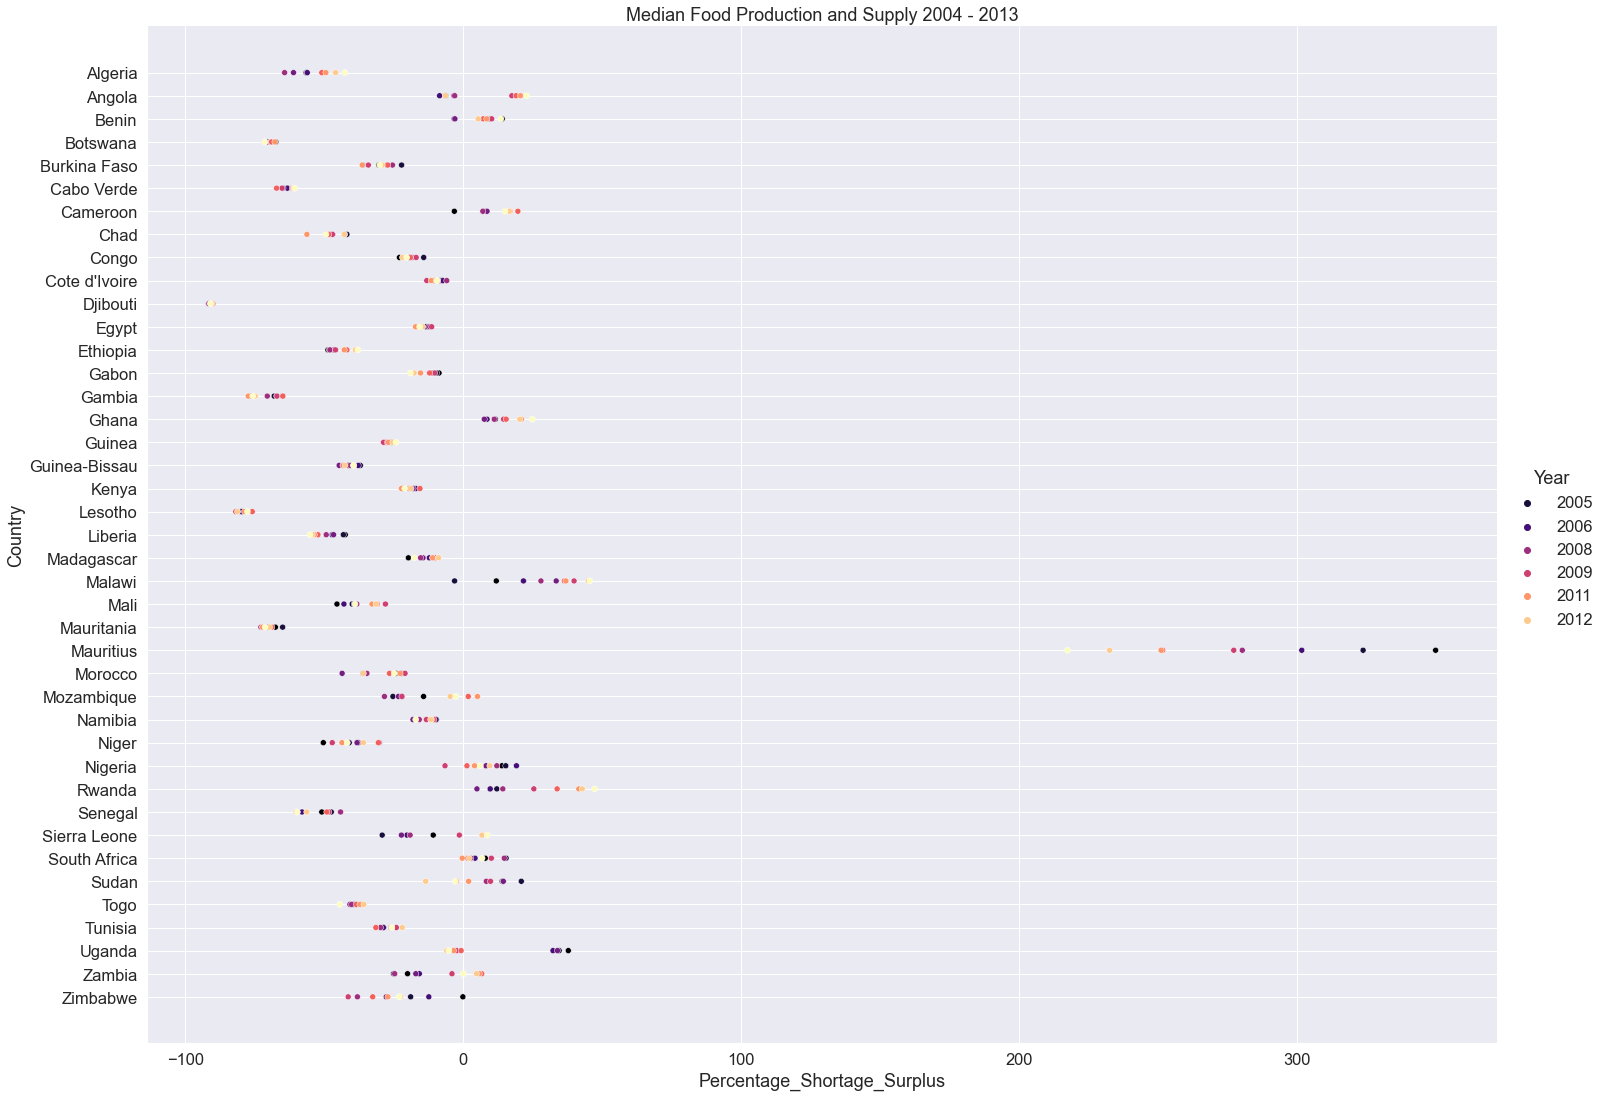

In [ ]:
#plot data with seaborn
Year = production_supply['Year']
Value1 = production_supply['Country']
Value2 = production_supply['Percentage_Shortage_Surplus']
# Keyword arguments for styling the plot
sns.set(font_scale = 1.5)
ax = sns.relplot(
    data=production_supply, 
    x="Percentage_Shortage_Surplus", y="Country",
    height=15, aspect=1.4, 
    legend=True,hue='Year', palette=('magma')).set(title="Median Food Production and Supply 2004 - 2013")
